In [1]:
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from scipy import stats

In [3]:
url='https://raw.githubusercontent.com/Geerdata/DS/main/Datacoder/Arc.%20Modelo/insurance.csv'
df= pd.read_csv(url,sep=',')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
lista = ['sex', 'bmi', 'smoker', 'region']
categoricas = df [lista]
categoricas.head()
noCategoricas = df.drop(columns=lista)

In [12]:
copia = categoricas.copy()
copia.head()

,sex,bmi,smoker,region
0,female,27.900,yes,southwest
1,male,33.770,no,southeast
2,male,33.000,no,southeast
3,male,22.705,no,northwest
4,male,28.880,no,northwest


In [21]:
label_encoder = LabelEncoder()
for column in copia:
    label_encoder.fit([column])
    copia[column] = label_encoder.fit_transform(copia[column])


categoricas = copia.copy()
categoricas.head()

,sex,bmi,smoker,region
0,0,197,1,3
1,1,350,0,2
2,1,331,0,2
3,1,73,0,1
4,1,223,0,1


In [22]:
df_limpio = pd.concat ([categoricas, noCategoricas], axis = 1)
df_limpio.reset_index(drop=True, inplace=True)
df_limpio


,sex,bmi,smoker,region,age,children,charges
0,0,197,1,3,19,0,16884.92400
1,1,350,0,2,18,1,1725.55230
2,1,331,0,2,28,3,4449.46200
3,1,73,0,1,33,0,21984.47061
4,1,223,0,1,32,0,3866.85520
...,...,...,...,...,...,...,...
1333,1,276,0,1,50,3,10600.54830
1334,0,302,0,0,18,0,2205.98080
1335,0,422,0,2,18,0,1629.83350
1336,0,146,0,3,21,0,2007.94500


In [37]:
X = df_limpio[['sex', 'bmi','smoker', 'region','children', 'age']]
y = df_limpio['charges']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
#Entrenamiento del modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [40]:
regressor.coef_

array([-9.87792883e+00,  1.53566043e+01,  2.36384565e+04, -2.76756361e+02,
        4.22362620e+02,  2.56145271e+02])

In [41]:
regressor.intercept_

-5693.151763600885

In [42]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
sex,-9.877929
bmi,15.356604
smoker,23638.456470
region,-276.756361
children,422.362620
age,256.145271


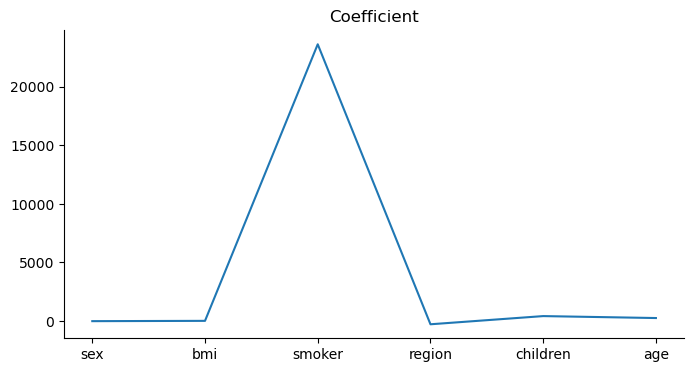

In [43]:

from matplotlib import pyplot as plt
coeff_df['Coefficient'].plot(kind='line', figsize=(8, 4), title='Coefficient')
plt.gca().spines[['top', 'right']].set_visible(False)

In [44]:
#Realizando las predicciones
y_pred = regressor.predict(X_test)

In [45]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
764,9095.06825,8689.825828
887,5272.17580,7167.255728
890,29330.98315,36687.825013
1293,9301.89355,9296.691890
259,33750.29180,27163.125072
...,...,...
109,47055.53210,39339.219156
575,12222.89830,11619.993149
535,6067.12675,7539.530688
543,63770.42801,39500.846344


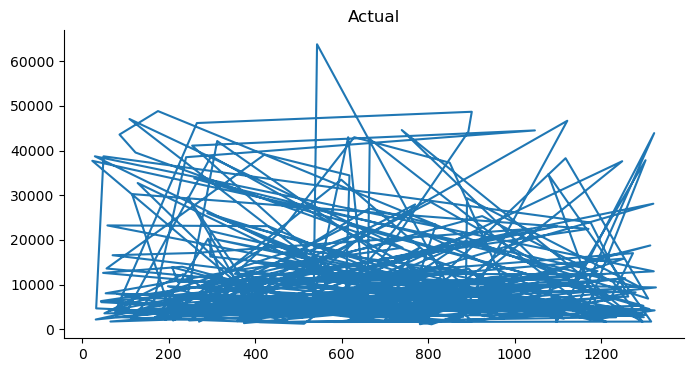

In [46]:
from matplotlib import pyplot as plt
df['Actual'].plot(kind='line', figsize=(8, 4), title='Actual')
plt.gca().spines[['top', 'right']].set_visible(False)

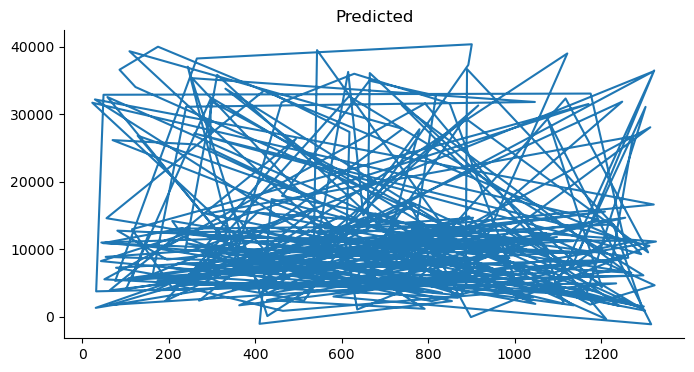

In [47]:
from matplotlib import pyplot as plt
df['Predicted'].plot(kind='line', figsize=(8, 4), title='Predicted')
plt.gca().spines[['top', 'right']].set_visible(False)

In [48]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4223.418113673837
Mean Squared Error: 33610184.8857486
Root Mean Squared Error: 5797.429161770638


In [49]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7835075071931935